<a href="https://colab.research.google.com/github/PavankumarUppar/DLL/blob/main/Program1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [100/1000], Loss: 0.5557
Epoch [200/1000], Loss: 0.4875
Epoch [300/1000], Loss: 0.4245
Epoch [400/1000], Loss: 0.3667
Epoch [500/1000], Loss: 0.3155
Epoch [600/1000], Loss: 0.2716
Epoch [700/1000], Loss: 0.2348
Epoch [800/1000], Loss: 0.2043
Epoch [900/1000], Loss: 0.1791
Epoch [1000/1000], Loss: 0.1583


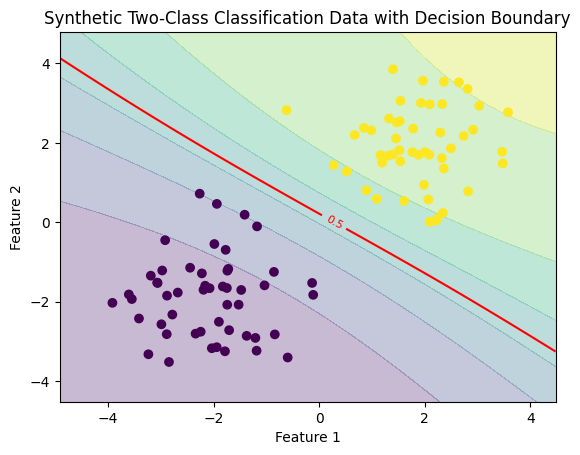

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic two-class classification dataset
np.random.seed(42)
X_positive = np.random.randn(50, 2) + np.array([2, 2])  # Class 1
X_negative = np.random.randn(50, 2) + np.array([-2, -2])  # Class 0
X = np.vstack([X_positive, X_negative])
y = np.vstack([np.ones((50, 1)), np.zeros((50, 1))])

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)

# Define the neural network architecture for binary classification
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(2, 10)  # Input layer to hidden layer
        self.layer2 = nn.Linear(10, 1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()    # Sigmoid activation function

    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model, define loss function and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the neural network
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_tensor)

    # Compute the loss
    loss = criterion(y_pred, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot the decision boundary and prediction line
with torch.no_grad():
    model.eval()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid_tensor = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model(grid_tensor).numpy()
    Z = Z.reshape(xx.shape)

# Plot the results
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')

# Plot the decision boundary (prediction line)
with torch.no_grad():
    model.eval()
    threshold = 0.5
    contour = plt.contour(xx, yy, Z, levels=[threshold], colors='red')
    plt.clabel(contour, inline=True, fontsize=8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Two-Class Classification Data with Decision Boundary')
plt.show()
